In [13]:
#Visualize Samples from the model
import sys,os,glob
sys.path.append('../../')
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
#mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif' 
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\\usepackage{amsfonts}','\\usepackage{amsmath}']
mpl.rcParams['font.size'] = 25
mpl.rcParams['axes.labelsize']=25
mpl.rcParams['legend.fontsize']=25
#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from utils.misc import getConfigFile, readPickle, loadHDF5, getUniqueIDFromParams
from optvaeutils.viz import getName,stitchMNISTSamples,processTrainValidBounds
subdirectories = ['none','finopt']
#DIR = '../../expt/chkpt-movielens100k-'
#DIR = '../../expt/chkpt-wikicorp-'

DIR = '../../expt/results-sept6/chkpt-rcv2_miao-'
short_names = {}
if os.path.exists('../../optvaeutils/default-hmap.pkl'):
    short_names = readPickle('../../optvaeutils/default-hmap.pkl')[0]
colors = {}
colors[0] = 'r'
colors[1] = 'b'
colors[2] = 'g'
colors[3] = 'k'
colors[4] = 'y'
colors[5] = 'k'
colors[6] = 'm'
colors[7] = 'c'
colors[8] = 'b'

markers = {}
markers[0]= '*'
markers[1]= '<'
markers[2]= '>'
markers[3]= '8'
markers[4]= 'p'
markers[5]= 'v'
markers[6]= '3'
markers[7]= '2'
markers[8]= '4'

#Evalaute POB 
from datasets.load import loadDataset
from optvaedatasets.load import loadDataset as loadDataset_OVAE
dataset        =DIR.split('chkpt-')[1][:-1]
print 'Dataset:', dataset
dset = loadDataset_OVAE(dataset)
NLL_train_prob,NLL_valid_prob = np.nan,np.nan

Dataset: rcv2_miao


In [14]:
#Visualize Training Curves (train/valid/test) across different 
datalist, l_params, namelist, svallist = [],[],[],[]
ctr = 0
for sdir in subdirectories:
    for f in glob.glob(DIR+sdir+'/*EP30-*.h5'):
        print f,
        params = readPickle(getConfigFile(f))[0]
        
        name   = getName(params)
        data   = loadHDF5(f)
        l_params.append(params)
        datalist.append(data)
        namelist.append(name)
        if 'valid_bound_0' in data:
            min_0 = np.min(data['valid_bound_0'][:,1])
            min_f = np.min(data['valid_bound_f'][:,1])
            amin  = np.argmin(data['valid_bound_f'][:,1])
            epmin = data['valid_bound_f'][amin,0]
        elif 'valid_perp_0' in data:
            min_0 = np.min(data['valid_perp_0'][:,1])
            min_f = np.min(data['valid_perp_f'][:,1])
            amin  = np.argmin(data['valid_perp_f'][:,1])
            epmin = data['valid_perp_f'][amin,0]
        else:
            print data.keys()
            min_0 = np.min(data['valid_perp_bound_0'][:,1])
            min_f = np.min(data['valid_perp_bound_f'][:,1])
            amin  = np.argmin(data['valid_perp_bound_f'][:,1])
            epmin = data['valid_perp_bound_f'][amin,0]
        
        print epmin,amin
        Wfiles = np.load(f.split('-final')[0].split('-EP')[0]+'-EP'+str(int(epmin))+'-params.npz')
        if 'p_0_W' in Wfiles:
            svals  = np.sort(np.linalg.svd(Wfiles['p_0_W'],compute_uv=False))
        else: 
            svals  = np.sort(np.linalg.svd(Wfiles['p_mean_W'],compute_uv=False))
        svallist.append(svals)
        #print ctr,name,min_0,min_f
        ctr+=1
p_names = getUniqueIDFromParams(l_params, short_names = short_names)
names   = []
for a,b in zip(namelist,p_names):
    names.append(a+b)
idxlist = []
print '\n'
#Restriction
for idx,name in enumerate(names):
    print idx,name
    if 'ds-200' in name:
        continue
    idxlist.append(idx)
svallist = [svallist[k] for k in idxlist]
datalist = [datalist[k] for k in idxlist]
def update_name(name):
    pl   = str(int(name.split('pl-')[1])+1)
    if 'baseline' in name:
        return pl+'-M1'
    else:
        return pl+'-M'+name.split('fin')[1].split('-')[0]
#names = [names[k] for k in idxlist]
names = [update_name(names[k]) for k in idxlist]

print '\n Restricted Plots to: ',names

../../expt/results-sept6/chkpt-rcv2_miao-none/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-none-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid-EP30-stats.h5 30.0 3
../../expt/results-sept6/chkpt-rcv2_miao-none/VAE_lr-8_0e-04-ph-400-ds-100-pl-0-ql-2-nl-relu-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-none-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid-EP30-stats.h5 30.0 3
../../expt/results-sept6/chkpt-rcv2_miao-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid-EP30-stats.h5 30.0 3
../../expt/results-sept6/chkpt-rcv2_miao-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-0-ql-2-nl-relu-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-100-om-adam-qs-s

3-M1 1352.42068695 3
USING
1-M1 1377.89971592 3
USING
3-M100 1166.62001025 3
USING
bounds-wikicorp.pdf saved


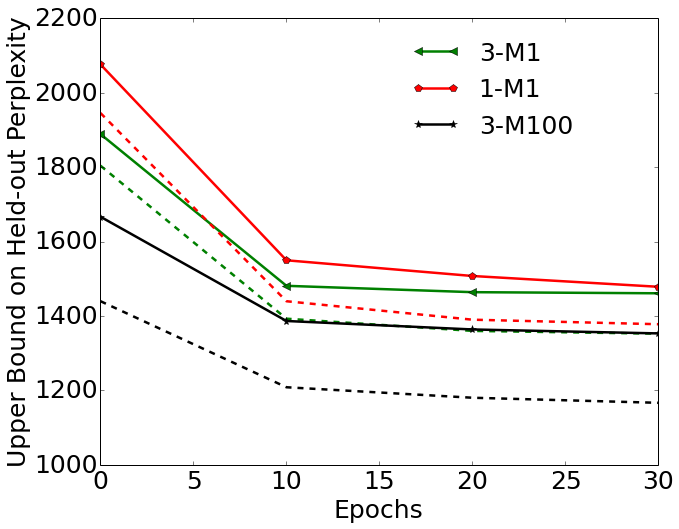

In [12]:
#Visualize Training Curves (train/valid/test)

colorFinal = {}
colorFinal['1-M1']    = 'r'
colorFinal['1-M100']  = 'b'
colorFinal['3-M1']    =  'g'
colorFinal['3-M100']  =  'k'
markerFinal = {}
markerFinal['1-M1']   = 'p'
markerFinal['1-M100'] = 'd'
markerFinal['3-M1']   =  '<'
markerFinal['3-M100'] =  '*'

fig,axlist     = plt.subplots(1,1,figsize=(10,8))  
ax = axlist
for idx,(data,name) in enumerate(zip(datalist,names)):
    if 'valid_perp_bound_0' in data:
        valid_bound_0 = data['valid_perp_bound_0']
        valid_bound_f = data['valid_perp_bound_f']
    elif 'valid_perp_0' in data:
        valid_bound_0 = data['valid_perp_0']
        valid_bound_f = data['valid_perp_f']
    else:
        valid_bound_0 = data['valid_bound_0']
        valid_bound_f = data['valid_bound_f']
    print name,np.min(valid_bound_f[:,1]),np.argmin(valid_bound_f[:,1])
    #ax.set_ylim([80,120])
    #ax.set_ylim([180,340])
    MARKER = markers[idx]
    COLOR  = colors[idx]
    if name in markerFinal:
        print 'USING'
        MARKER = markerFinal[name]
        COLOR  = colorFinal[name]
        
    ax.plot(valid_bound_0[:,0],valid_bound_0[:,1],color=COLOR,marker = MARKER,label=name)
    ax.plot(valid_bound_f[:,0],valid_bound_f[:,1],'--',color=COLOR)

ax.set_ylabel('Upper Bound on Held-out Perplexity')
ax.set_xlabel('Epochs')
ax.hlines(NLL_valid_prob, 0, ax.get_xlim()[1], linestyles='dashdot',colors='k')
if 'rcv2_miao' in dataset:
    ax.set_xlim([0,200])
ax.set_ylim
ax.legend(loc='upper center', bbox_to_anchor=(.7, 1.),ncol=1, frameon=False)
fname = 'bounds-'+dataset+'.pdf'
print fname,'saved'
plt.savefig(fname,bbox_inches='tight')

3-M1 1352.42068695 3
1-M1 1377.89971592 3
3-M100 1166.62001025 3
bounds-wikicorp.pdf saved


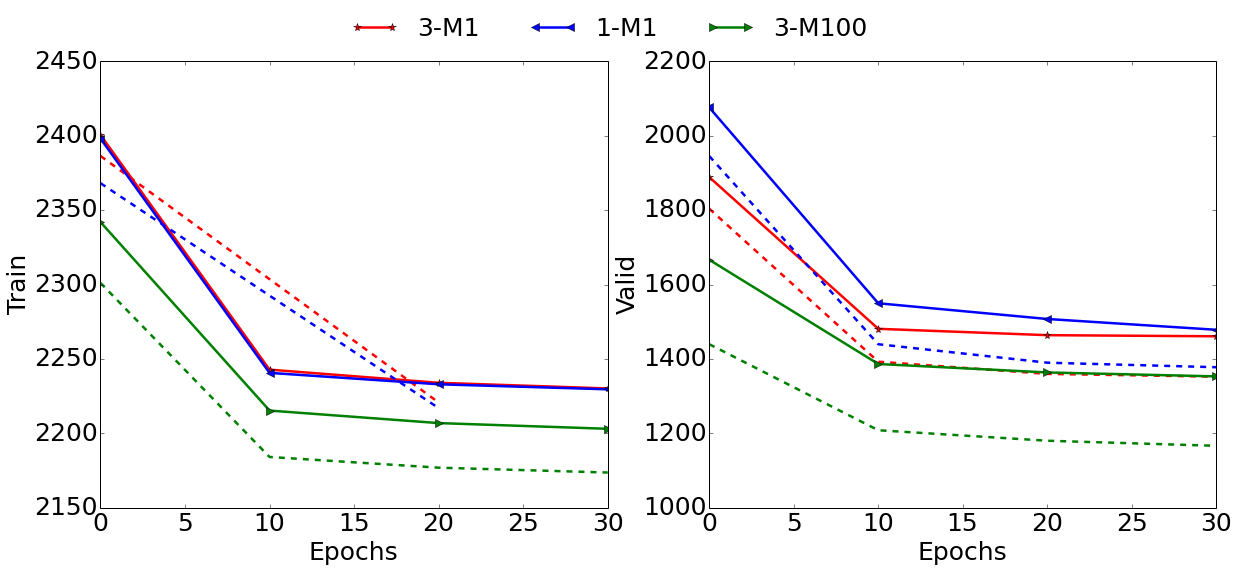

In [10]:
#Visualize Training Curves (train/valid/test)
fig,axlist     = plt.subplots(1,2,figsize=(20,8))  
fig.subplots_adjust(hspace = 0.5)
for idx,(data,name) in enumerate(zip(datalist,names)):
    if 'valid_perp_bound_0' in data:
        valid_bound_0 = data['valid_perp_bound_0']
        valid_bound_f = data['valid_perp_bound_f']
    elif 'valid_perp_0' in data:
        valid_bound_0 = data['valid_perp_0']
        valid_bound_f = data['valid_perp_f']
    else:
        valid_bound_0 = data['valid_bound_0']
        valid_bound_f = data['valid_bound_f']
    train_bound_0 = processTrainValidBounds(data['train_bound_0'],valid_bound_0 , params['savefreq'])
    train_bound_f = processTrainValidBounds(data['train_bound_f'],valid_bound_f , params['savefreq'])
    ax         = axlist.ravel()[0]
    #ax.set_ylim([80,120])
    #ax.set_ylim([180,340])
    print name,np.min(valid_bound_f[:,1]),np.argmin(valid_bound_f[:,1])
    
    ax.plot(train_bound_0[:,0],train_bound_0[:,1],color=colors[idx],marker = markers[idx],label=name)
    ax.plot(train_bound_f[:,0],train_bound_f[:,1],'--',color=colors[idx])
    ax         = axlist.ravel()[1]
    #ax.set_ylim([80,120])
    #ax.set_ylim([180,340])
    ax.plot(valid_bound_0[:,0],valid_bound_0[:,1],color=colors[idx],marker = markers[idx])
    ax.plot(valid_bound_f[:,0],valid_bound_f[:,1],'--',color=colors[idx])

ax         = axlist.ravel()[0]
ax.set_xlabel('Epochs')
ax.set_ylabel('Train')
ax.hlines(NLL_train_prob, 0, ax.get_xlim()[1], linestyles='dashdot',colors='k')

ax         = axlist.ravel()[1]
ax.set_ylabel('Valid')
ax.set_xlabel('Epochs')
ax.hlines(NLL_valid_prob, 0, ax.get_xlim()[1], linestyles='dashdot',colors='k')

axlist.ravel()[0].legend(loc='upper center', bbox_to_anchor=(1., 1.15),ncol=4, frameon=False)
fname = 'bounds-'+dataset+'.pdf'
print fname,'saved'
#plt.savefig(fname,bbox_inches='tight')

In [ ]:
print dataset

logsingular-wikicorp.pdf saved


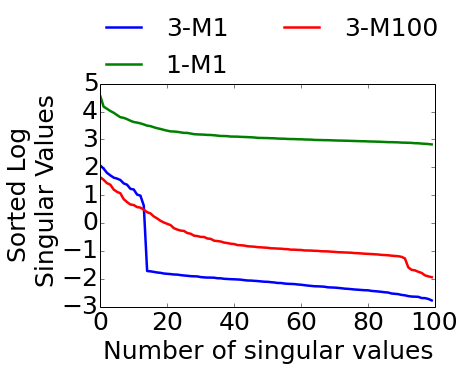

In [11]:
#Plot Eigenspectrum of first W matrix
for idx,(svals,name) in enumerate(zip(svallist,names)):
    if 'res' in name:
        continue
    MARKER = markers[idx]
    COLOR  = colors[idx]
    if name in markerFinal:
        MARKER = markerFinal[name]
        COLOR  = colorFinal[name]
    plt.plot(np.arange(len(svals)),np.log(svals[::-1]),label = name)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),ncol=2, frameon=False)
plt.ylabel('Sorted Log\n Singular Values')
plt.xlabel('Number of singular values')
fname = 'logsingular-'+dataset+'.pdf'
print fname,'saved'
plt.savefig(fname,bbox_inches='tight')

In [ ]:
#re-use minibatch 10 times. updates for p/q